In [2]:
import cv2
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
from PIL import Image
from PIL import ImageFilter
from matplotlib import animation
from PIL import ImageEnhance

from tkinter import filedialog
import tkinter as tk

import pickle

from os import sys

import matplotlib.pyplot as plt
import argparse

from statistics import mean
import os

%matplotlib inline

# for loading array 
from scipy.interpolate import interp1d
from scipy.io import loadmat
from scipy import signal as sig
import pandas as pd
import numpy as np
from scipy.signal import filtfilt, butter


sys.path.append(r'C:\Users\Nicolas\Documents\GitHub\WorkScripts')

from LibrairieNico.HitsFctClass import smooth, calculateNewSize

def FindPeaks (height):
    Nheight = 0.01
    PeaksNO2 , values = sig.find_peaks(diffmask, Nheight)
    return PeaksNO2 , height

[ 233  262  315  370  406  438  475  506  538  590  610  645  672  702
  731  756  812  862  893  921  949  974 1004 1030 1057 1080 1109 1142
 1172 1245 1285]
0.02 [ 233  262  315  370  406  438  475  506  538  590  610  645  672  702
  756  812  862  893  921  949  974 1004 1030 1057 1080 1109 1142 1172
 1245]
0.03 [ 315  370  406  438  475  506  538  590  610  645  672  702  756  812
  862  893  921  949  974 1004 1030 1057 1080 1109 1142 1172 1245]
0.04 [ 315  370  406  438  475  506  538  590  610  645  672  702  756  812
  862  893  921  949  974 1004 1030 1057 1080 1109 1142 1172 1245]
0.05 [ 315  370  406  438  475  506  538  590  610  645  672  702  756  812
  862  893  921  949  974 1004 1030 1057 1080 1109 1142 1172 1245]
0.060000000000000005 [ 315  370  406  438  475  506  538  590  610  645  672  702  756  812
  862  893  921  949  974 1004 1030 1057 1080 1109 1142 1172 1245]
0.07 [ 315  370  406  438  475  506  538  590  645  672  702  756  812  862
  893  921  949  974 10

C:\ProgramData\Anaconda3\envs\ArduinoComs\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


([<matplotlib.axis.YTick at 0x2369aa72400>,
 <a list of 24 Text major ticklabel objects>)

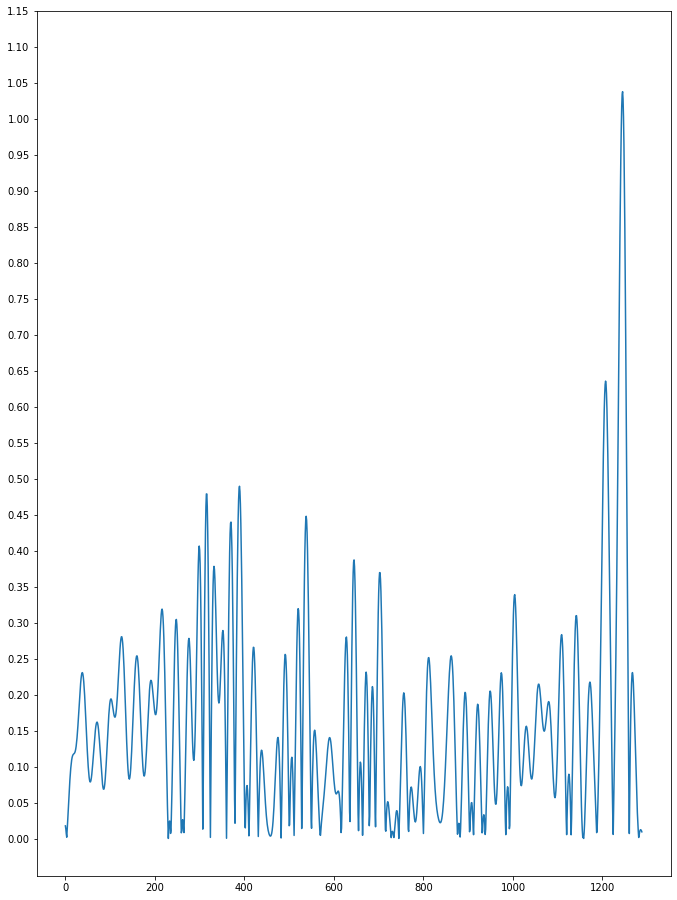

In [20]:
##Rendre la detection des peaks modulable###
##FindRefPeacksObj2 mOdulable###



video_path =  r"C:\Users\Nicolas\Desktop\Test_Hit\Mouse24_2020-02-10T14.41.12.avi"

HandleBEHAV = cv2.VideoCapture(video_path, 0)


length = int(HandleBEHAV.get(cv2.CAP_PROP_FRAME_COUNT))


_ , IMG1 = HandleBEHAV.read()


HandleBEHAV = cv2.VideoCapture(video_path, 0)
length = int(HandleBEHAV.get(cv2.CAP_PROP_FRAME_COUNT))

_ , IMG1 = HandleBEHAV.read()

linemask2= IMG1[601:602, : , 0]

linemask2 = np.invert(linemask2)
linemask2 = linemask2.flatten()

smoothmask = smooth(linemask2)

b, a = butter(8, 0.075)
smoothfiltered = filtfilt(b, a, smoothmask)

diffmask = np.diff(smoothfiltered,n=1)

PeaksNO2 , values = sig.find_peaks(diffmask, height = 0.01)

print(PeaksNO2)
list1 = []


if np.size(PeaksNO2) > 1: 

    var_Peaks = 1
    height = 0.01

    while np.size(PeaksNO2) > var_Peaks :
        height = height +0.01
        PeaksNO2_2 , values = sig.find_peaks(diffmask, height)
        print(height, PeaksNO2_2)
        
        if np.size(PeaksNO2_2) == 1:
            list1.append(PeaksNO2_2)
            break
                
print("le peak = ",  list1 [0])


Peaks3 = ((list1 [0])  - 15)
Peaks4 = ((list1 [0])  + 10)
    

print(Peaks3, Peaks4)



fig = plt.figure(figsize = (25,35))


plt.subplot(221), plt.plot(abs(diffmask))
plt.yticks( np.arange(0, 1.2, step=0.05))


#plt.subplot(222), plt.plot(abs(smooth(np.asarray(ListObj1)-MeanPeaks)))

#plt.subplot(222), plt.plot(np.asarray(ListObj1))
#plt.xticks(range(0, 540, 20))
#plt.yticks(range(200, 500, 30))
#plt.grid(axis="x")

#plt.subplot(224), plt.plot(Listframe, Listpeaks, 'o')